# Myanmar Coup fatality Dataset

source: [aappb](https://aappb.org/?cat=109)

In [1]:
import camelot
import numpy as np
import matplotlib.pyplot as plt

## Load data from pdf file

In [2]:
tables = camelot.read_pdf("Recent-Fatality-List-for-August-19-2021-English.pdf", pages='1-81')
tables.n

81

In [134]:
dataset = tables[0].df

for tableIndex in range(1, tables.n):
    dataset = dataset.append(tables[tableIndex].df, ignore_index=True)

dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of \nIncident,Deceased \nDate,Organization,Place of Incidents Home Adress,,Township,States/Regi\nons,Remarks
1,1,Na Pwar (aka) \nKo Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, \nbetween 37 and \n38 Street",Mahaaungmye,Mandalay \nRegion,"In another incident, 32 year old Ko Na \nPwar ..."
2,2,Mya Thwate \nThwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, \n Lower \nPaunglaung \nHydro ...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup \nprotests i..."
3,3,Nay Nay Win \nHtet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi \nRegion",Toe Chal Ward,Myeik,Tanintharyi \nRegion,"On 15 February evening, 18-year old \nMaung Na..."
4,4,Thet Naing Win \n@ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, \nMandalay City",Near 41 Street,Mahaaungmye,Mandalay \nRegion,"In Mandalay, a shipyaroad raid turned \nviolen..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951 Bo Aung,,M,60,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu \nVillage,Kyauk Khel Tat \nVillage,Minkin,Sagaing \nRegion,Terrorist junta’s troops raided Kyauk \nKhel T...
952,952 Chit Lwin,,M,60,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu \nVillage,Kyauk Khel Tat \nVillage,Minkin,Sagaing \nRegion,Terrorist junta’s troops raided Kyauk \nKhel T...
953,,953 Phoe Toke,M,27,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu \nVillage,Kyauk Khel Tat \nVillage,Minkin,Sagaing \nRegion,Terrorist junta’s troops raided Kyauk \nKhel T...
954,,954 Thet Naing Oo,M,30,Unknown Name,18-Aug-21,19-Aug-21,Civilian,School of Kyauk Kan \nVillage,Kyauk Kan \nVillage,Myingyan,Mandalay \nRegion,Thet Naing Oo from Kyauk Kan Village \nin Mand...


## Cleanup data

 Cleanup newline (\n)

In [135]:
dataset = dataset.applymap(lambda str: str.replace('\n', ''))
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents Home Adress,,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power ...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951 Bo Aung,,M,60,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu Village,Kyauk Khel Tat Village,Minkin,Sagaing Region,Terrorist junta’s troops raided Kyauk Khel Tat...
952,952 Chit Lwin,,M,60,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu Village,Kyauk Khel Tat Village,Minkin,Sagaing Region,Terrorist junta’s troops raided Kyauk Khel Tat...
953,,953 Phoe Toke,M,27,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu Village,Kyauk Khel Tat Village,Minkin,Sagaing Region,Terrorist junta’s troops raided Kyauk Khel Tat...
954,,954 Thet Naing Oo,M,30,Unknown Name,18-Aug-21,19-Aug-21,Civilian,School of Kyauk Kan Village,Kyauk Kan Village,Myingyan,Mandalay Region,Thet Naing Oo from Kyauk Kan Village in Mandal...


Fix column names

In [136]:
header = dataset.head(1).to_numpy()[0]
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents Home Adress',
       '', 'Township', 'States/Regions', 'Remarks'], dtype=object)

In [137]:
header[-5] = 'Place of Incidents'
header[-4] = 'Home Address'
header[-2] = 'States/Regions'
header[-1] = 'Remarks'
header

array(['No.', 'Name', 'Sex', 'Age', "Father's name", 'Date of Incident',
       'Deceased Date', 'Organization', 'Place of Incidents',
       'Home Address', 'Township', 'States/Regions', 'Remarks'],
      dtype=object)

In [138]:
dataset.columns = header
dataset = dataset.drop(index=0)
dataset = dataset.drop(dataset.tail(1).index)

dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power ...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,,5 Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950 Nan,,M,40,Unknown Name,12-Aug-21,12-Aug-21,Civilian,Gonetan Village,Gonetan Village,Shwebo,Sagaing Region,"Junta troops raided Paline, Gonetan and Kantha..."
951,951 Bo Aung,,M,60,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu Village,Kyauk Khel Tat Village,Minkin,Sagaing Region,Terrorist junta’s troops raided Kyauk Khel Tat...
952,952 Chit Lwin,,M,60,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu Village,Kyauk Khel Tat Village,Minkin,Sagaing Region,Terrorist junta’s troops raided Kyauk Khel Tat...
953,,953 Phoe Toke,M,27,Unknown Name,16-Aug-21,17-Aug-21,Civilian,Pannsettaungphyu Village,Kyauk Khel Tat Village,Minkin,Sagaing Region,Terrorist junta’s troops raided Kyauk Khel Tat...


Parse age that inclulde string

In [139]:
def parse_age(age):
  if age.find(' ') > 0:
    if 'Around one-years-old' in age:
      return '1'
    else:
      return age.split()[0]
  return age

dataset['Age'] = dataset['Age'].apply(parse_age)

Expand combined row

In [140]:
for index, row in dataset.iterrows():
    name = row['Name']
    numbers = [int(s) for s in name.split() if s.isdigit()]

    # Number exist in name case
    if len(numbers) > 0:
        # Remove number from name
        dataset.at[index,'Name']= name.replace(str(numbers[0]), '').strip()
        
        # Combined row case
        if row['No.'] != '' and 'unknown name' in name.lower():
            for i in range(numbers[0] - 1):
                dataset = dataset.append(row)

dataset

,No.,Name,Sex,Age,Father's name,Date of Incident,Deceased Date,Organization,Place of Incidents,Home Address,Township,States/Regions,Remarks
1,1,Na Pwar (aka) Ko Nyi Nyi Oo,M,32,U Hla Ngwe,8-Feb-21,8-Feb-21,Civilian,Mandalay,"75 Street, between 37 and 38 Street",Mahaaungmye,Mandalay Region,"In another incident, 32 year old Ko Na Pwar (a..."
2,2,Mya Thwate Thwate Khaing,F,19,U Min Lwin,9-Feb-21,19-Feb-21,Student,NayPyi Taw,"Hlaykhwintaung, Lower Paunglaung Hydro Power ...",Zeyathiri,Naypyidaw,"On February 9, peaceful anti-coup protests in ..."
3,3,Nay Nay Win Htet,M,18,unknown,15-Feb-21,15-Feb-21,Civilian,"Myeik, Tanintharyi Region",Toe Chal Ward,Myeik,Tanintharyi Region,"On 15 February evening, 18-year old Maung Nay ..."
4,4,Thet Naing Win @ Min Min,M,37,U Maung San,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
5,,Wai Yan Tun,M,16,unknown,20-Feb-21,20-Feb-21,Civilian,"Kannar Road, Mandalay City",Near 41 Street,Mahaaungmye,Mandalay Region,"In Mandalay, a shipyaroad raid turned violent ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,Unknown Name,,,Unknown Name,9-Apr-21,9-Apr-21,Civilian,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
655,655,Unknown Name,,,Unknown Name,9-Apr-21,9-Apr-21,Civilian,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
655,655,Unknown Name,,,Unknown Name,9-Apr-21,9-Apr-21,Civilian,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."
655,655,Unknown Name,,,Unknown Name,9-Apr-21,9-Apr-21,Civilian,Maggatic Road,,Bago,Bago Region,"Earlier on April 9, before dawn, the terrorist..."


Drop unused columns

In [141]:
dataset = dataset.drop(columns=['No.','Name',"Father's name", 'Home Address', 'Deceased Date', 'Place of Incidents', 'Township', 'States/Regions', 'Remarks'])
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,8-Feb-21,Civilian
2,F,19,9-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian


## Explore data

In [142]:
dataset.describe()

,Sex,Age,Date of Incident,Organization
count,1007,1007,1007,1007
unique,4,70,148,81
top,M,,27-Mar-21,Civilian
freq,805,266,164,834


In [143]:
dataset['Sex'].value_counts()

M          805
           132
F           69
LGBT 37      1
Name: Sex, dtype: int64

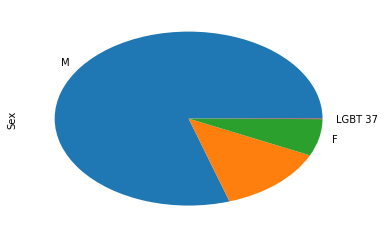

In [144]:
dataset['Sex'].value_counts().plot(kind='pie')


In [145]:
dataset['Age'].value_counts()

      266
19     44
20     40
30     37
40     34
     ... 
75      1
90      1
78      1
72      1
76      1
Name: Age, Length: 70, dtype: int64

In [146]:
# def parse_age(str):
#   if str.find(' ') > 0:
#     return str.split()[0]
  
#   return str

# dataset['Age'] = dataset['Age'].apply(parse_age)

(array([  4., 122., 252., 184., 108.,  43.,  18.,   7.,   2.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

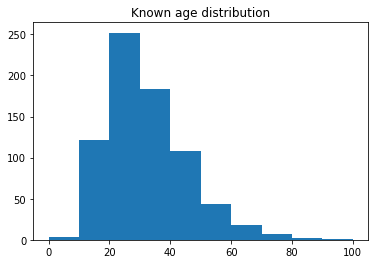

In [147]:
ages = dataset['Age'].to_numpy()

fig, ax = plt.subplots()
ax.set_title('Known age distribution')
ax.hist(ages[ages != ''].astype(np.int), range=[0, 100])

In [148]:
dataset['Organization'].value_counts()

Civilian                                                                                                                                834
Student                                                                                                                                  55
                                                                                                                                         17
Teacher                                                                                                                                   7
Doctor                                                                                                                                    4
                                                                                                                                       ... 
Business men                                                                                                                              1
MP of Bago Region Hl

In [149]:
def conbine_organization(org):
    lower_org = org.lower()
    if 'student' in lower_org or 'b.a' in lower_org:
        return 'Student'
    elif 'doctor' in lower_org or 'nurse' in lower_org:
        return 'Doctor/Nurse'
    elif 'nld' in lower_org:
        return 'NLD'
    elif 'engineer' in lower_org:
        return 'Engineer'
    elif 'teacher' in lower_org:
        return 'Teacher'
    elif 'bank staff' in lower_org or 'kbz' in lower_org:
        return 'Bank Staff'
    elif 'servant' in lower_org or 'department' in lower_org:
        return 'Civil Servant'
    elif 'civilian' in lower_org:
        return 'Civilian'
    elif 'activist' in lower_org:
        return 'Activist'
    else:
        return org

grouped_organizations = dataset['Organization'].apply(conbine_organization)
grouped_organizations.value_counts()

Civilian                                                                     836
Student                                                                       74
                                                                              17
NLD                                                                           11
Teacher                                                                        9
Doctor/Nurse                                                                   6
Engineer                                                                       5
Civil Servant                                                                  4
Bank Staff                                                                     4
Volunteer                                                                      3
Poet                                                                           3
Activist                                                                       3
Worker Association          

In [150]:
grouped_organizations_counts = grouped_organizations.value_counts()

def cut_other_organizations(org):
    if grouped_organizations_counts[org] < 4:
        return 'Other'
    return org

grouped_organizations = grouped_organizations.apply(cut_other_organizations)
grouped_organizations.value_counts()

Civilian         836
Student           74
Other             41
                  17
NLD               11
Teacher            9
Doctor/Nurse       6
Engineer           5
Bank Staff         4
Civil Servant      4
Name: Organization, dtype: int64

In [151]:
dataset['Organization'] = grouped_organizations
dataset

,Sex,Age,Date of Incident,Organization
1,M,32,8-Feb-21,Civilian
2,F,19,9-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian


## Export JSON

In [152]:
dataset.columns = ['sex', 'age', 'dateOfIncident', 'organization']
dataset

,sex,age,dateOfIncident,organization
1,M,32,8-Feb-21,Civilian
2,F,19,9-Feb-21,Student
3,M,18,15-Feb-21,Civilian
4,M,37,20-Feb-21,Civilian
5,M,16,20-Feb-21,Civilian
...,...,...,...,...
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian
655,,,9-Apr-21,Civilian


In [153]:
dataset.to_csv('recent-fatality.csv', index=False)